In [202]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import rosbag

# from geometry_msgs.msg import Point, Quaternion, Vector3
# from snapstack_msgs.msg import State, Goal, AttitudeCommand, ControlLog, QuadFlightMode

plt.rcParams.update({'font.size': 24})

In [203]:
filename = 'reg_P_2e-3_reg_k_R_0.bag'
filename = 'reg_P_2e-3_reg_k_R_2e-3_k_R_z_1.4.bag'
filename = 'reg_P_1e-1_reg_k_R_0_k_R_scale_1_k_R_z_1.4.bag'
filename = 'reg_P_1_reg_Kr_1e-3.bag'
filename = 'reg_P_1e-2_reg_k_R_0_k_R_scale_1.1_k_R_z_1.4.bag'
# filename = 'reg_P_1e-1_reg_k_R_0_k_R_scale_1.1_k_R_z_1.4.bag'
filename = 'pid.bag'

# filename = 'reg_P_1e-1_reg_k_R_0_k_R_scale_1.1_k_R_z_1.4_30sec.bag'
# filename = 'pid_30sec.bag'

# filename = 'reg_P_1e-1_reg_k_R_0_k_R_scale_1.1_k_R_z_1.4_circle.bag'
# filename = 'pid_circle.bag'

filename = 'coml_point_no_wind.bag'
filename = 'pid_point_no_wind.bag'

filename = 'real_2024-04-24-18-43-43.bag'

b = bagreader(f'../rosbags/{filename}')

# replace the topic name as per your need
# topic_log = b.message_by_topic('/HX14s/log')
topic_log = b.message_by_topic('/HX14/log')
# topic_wind = b.message_by_topic('/HX14s/wind')
topic_wind = b.message_by_topic('/HX14/wind')
df_wind = pd.read_csv(topic_wind)
df_log = pd.read_csv(topic_log)
print(df_log.keys())
print(df_wind.keys())

[INFO]  Data folder ../rosbags/real_2024-04-24-18-43-43 already exists. Not creating.
Index(['Time', 'header.seq', 'header.stamp.secs', 'header.stamp.nsecs',
       'header.frame_id', 'p.x', 'p.y', 'p.z', 'p_ref.x', 'p_ref.y', 'p_ref.z',
       'p_err.x', 'p_err.y', 'p_err.z', 'p_err_int.x', 'p_err_int.y',
       'p_err_int.z', 'v.x', 'v.y', 'v.z', 'v_ref.x', 'v_ref.y', 'v_ref.z',
       'v_err.x', 'v_err.y', 'v_err.z', 'a_ff.x', 'a_ff.y', 'a_ff.z', 'a_fb.x',
       'a_fb.y', 'a_fb.z', 'j_ff.x', 'j_ff.y', 'j_ff.z', 'j_fb.x', 'j_fb.y',
       'j_fb.z', 'q.x', 'q.y', 'q.z', 'q.w', 'q_ref.x', 'q_ref.y', 'q_ref.z',
       'q_ref.w', 'rpy.x', 'rpy.y', 'rpy.z', 'rpy_ref.x', 'rpy_ref.y',
       'rpy_ref.z', 'w.x', 'w.y', 'w.z', 'w_ref.x', 'w_ref.y', 'w_ref.z',
       'F_W.x', 'F_W.y', 'F_W.z', 'P_norm', 'A_norm', 'y_norm', 'f_hat.x',
       'f_hat.y', 'f_hat.z', 'power'],
      dtype='object')
Index(['Time', 'header.seq', 'header.stamp.secs', 'header.stamp.nsecs',
       'header.frame_id', 'w

In [204]:
err_x = df_log['p_err.x'].to_numpy()
err_y = df_log['p_err.y'].to_numpy()
err_z = df_log['p_err.z'].to_numpy()
total_err = np.vstack((err_x, err_y, err_z)).T # T x 3
avg_tracking_error = np.mean(np.linalg.norm(total_err, axis=1))
print('avg tracking error = ', avg_tracking_error)

avg tracking error =  0.02039217953709826


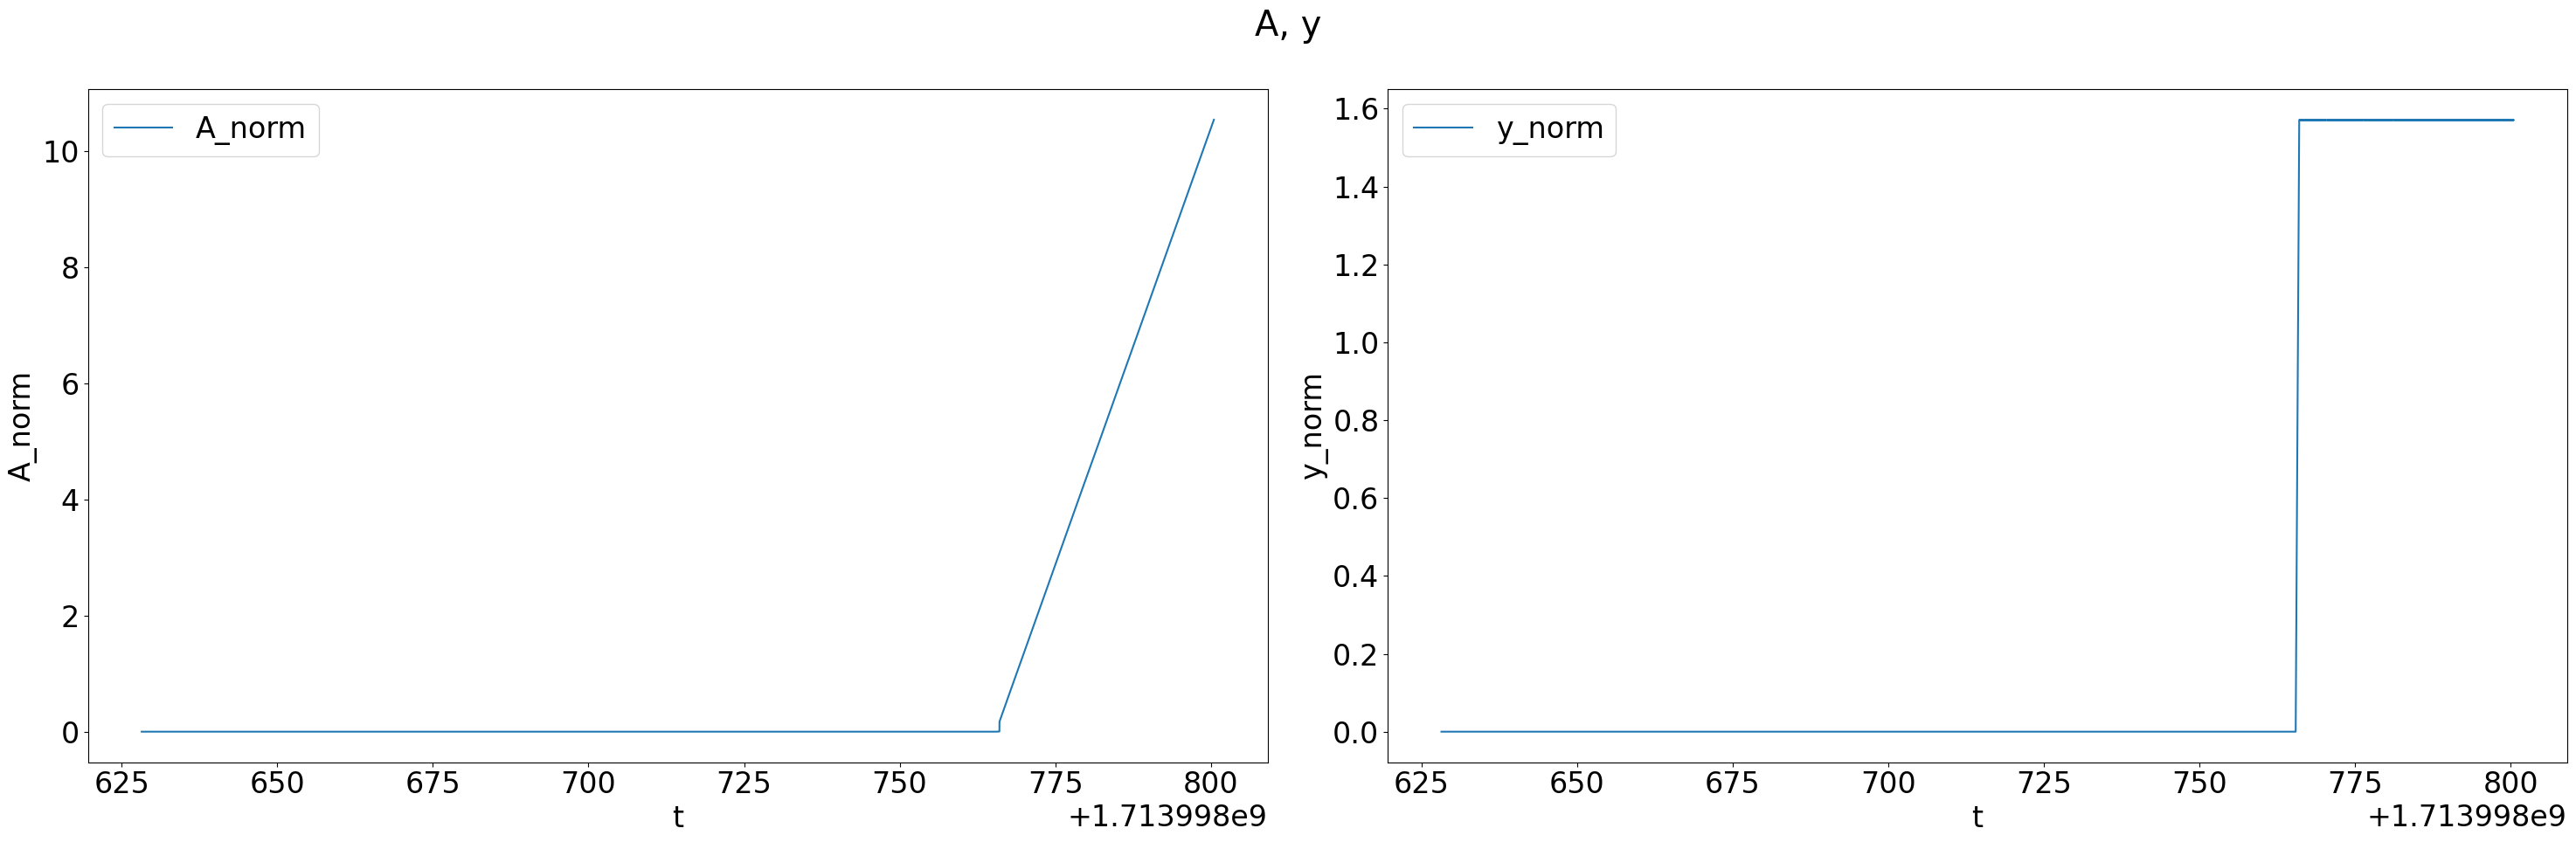

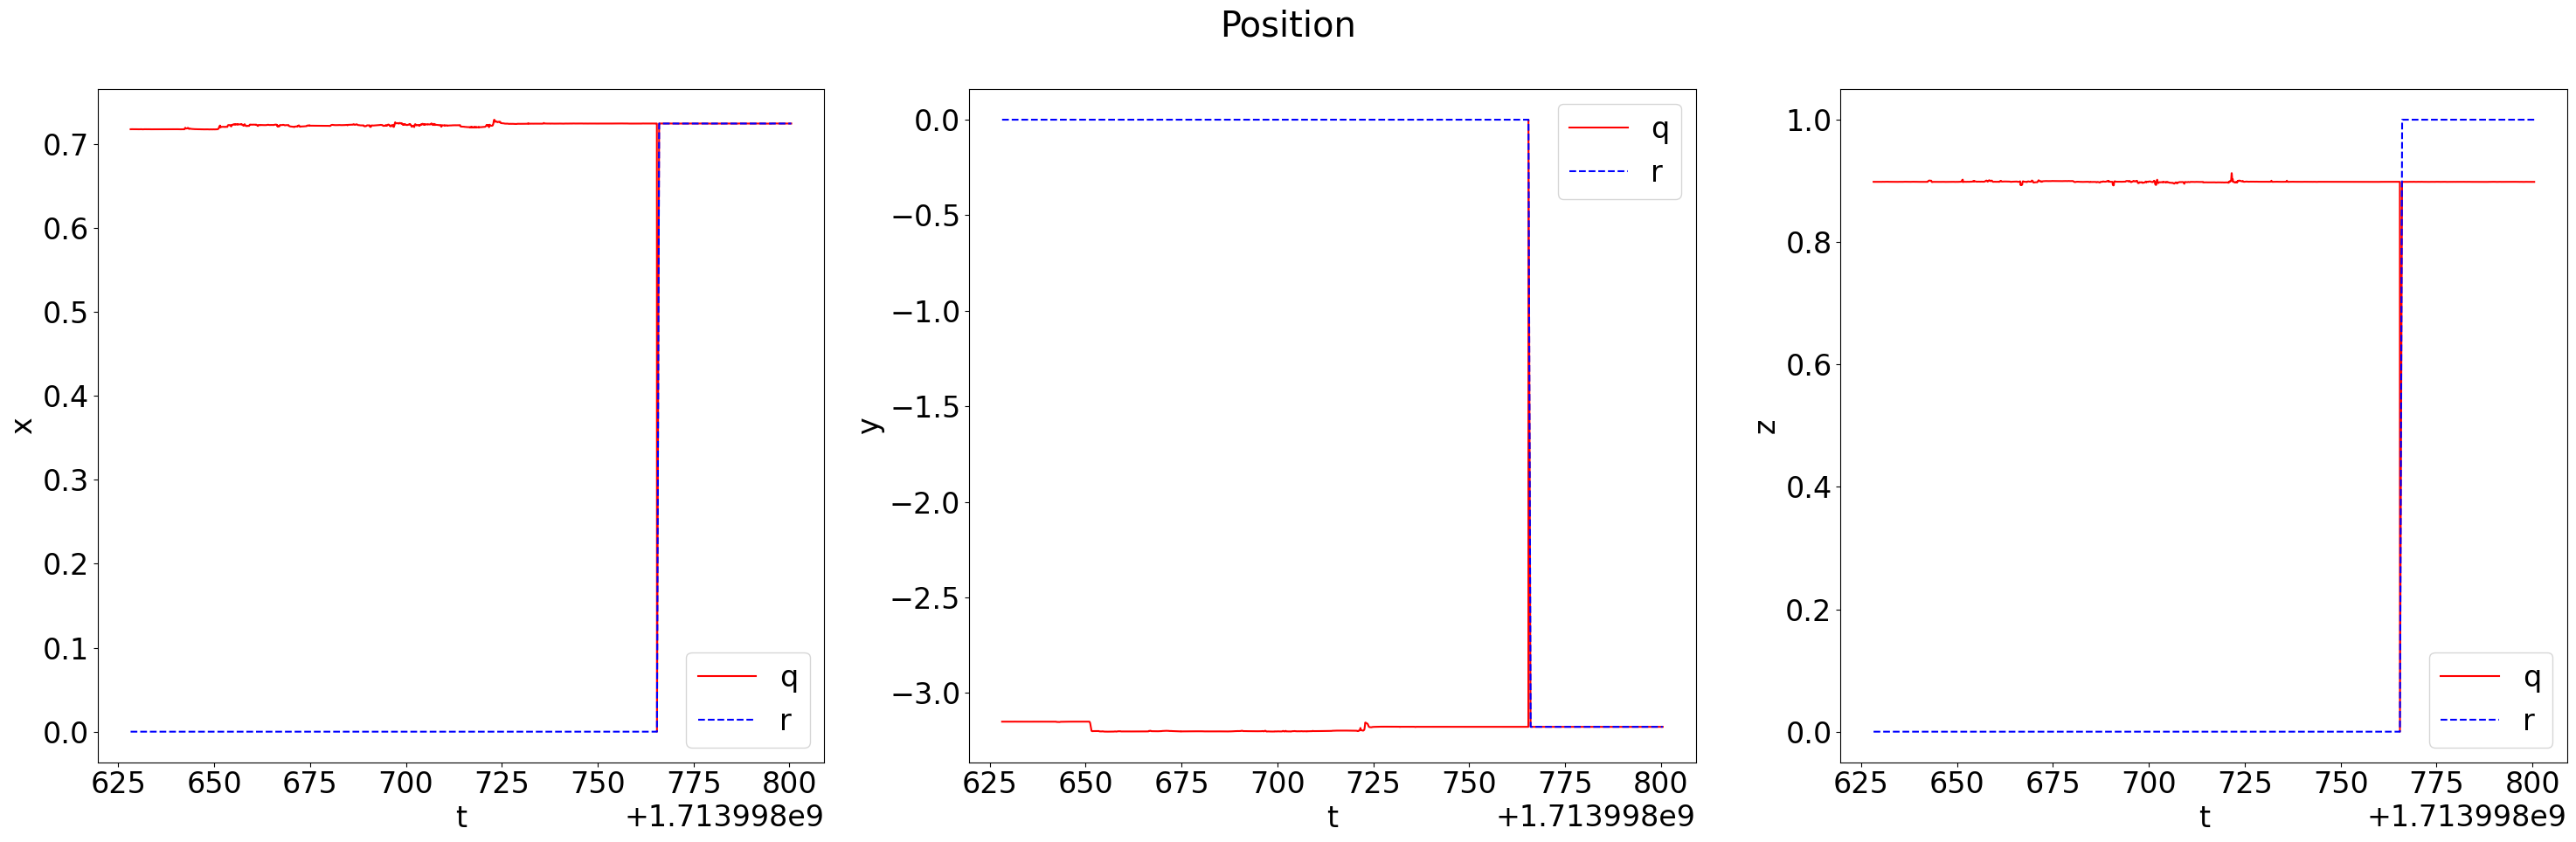

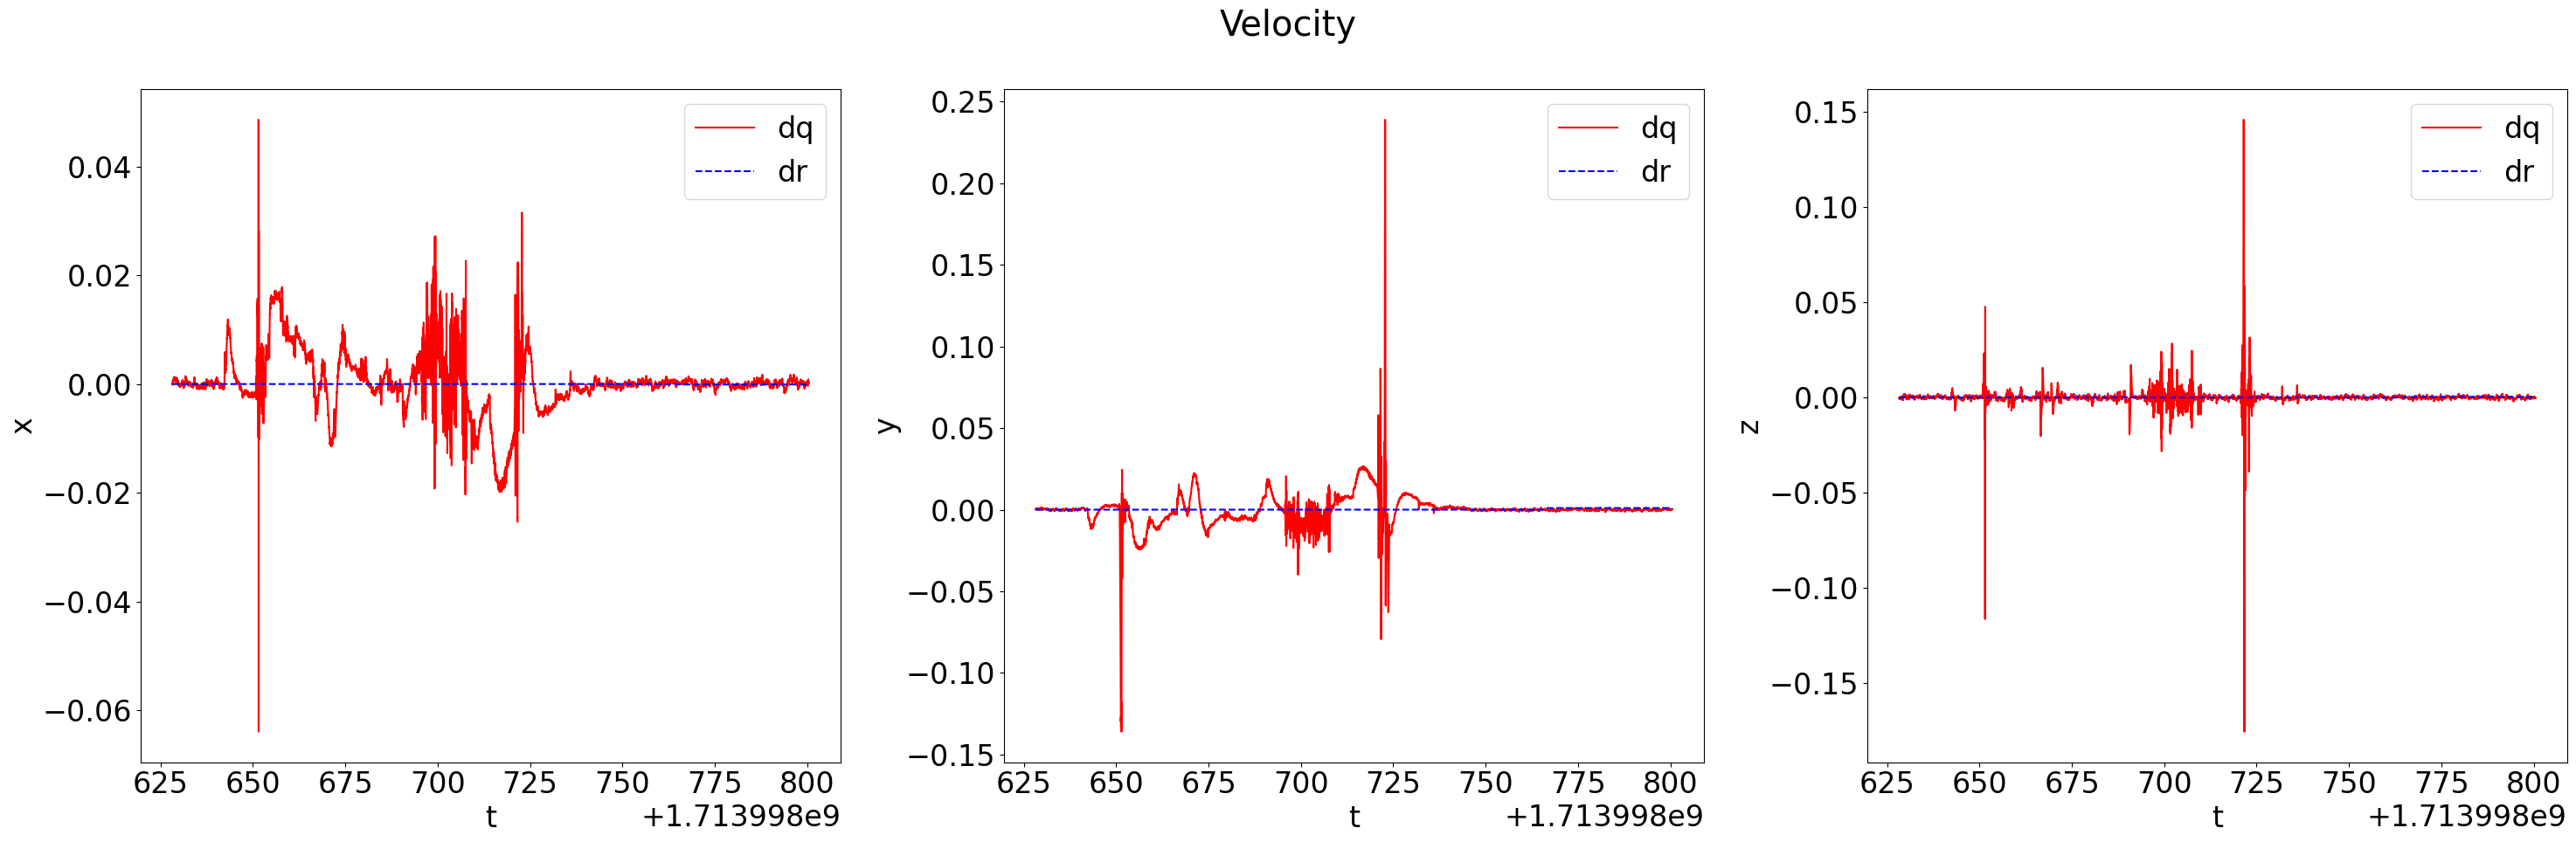

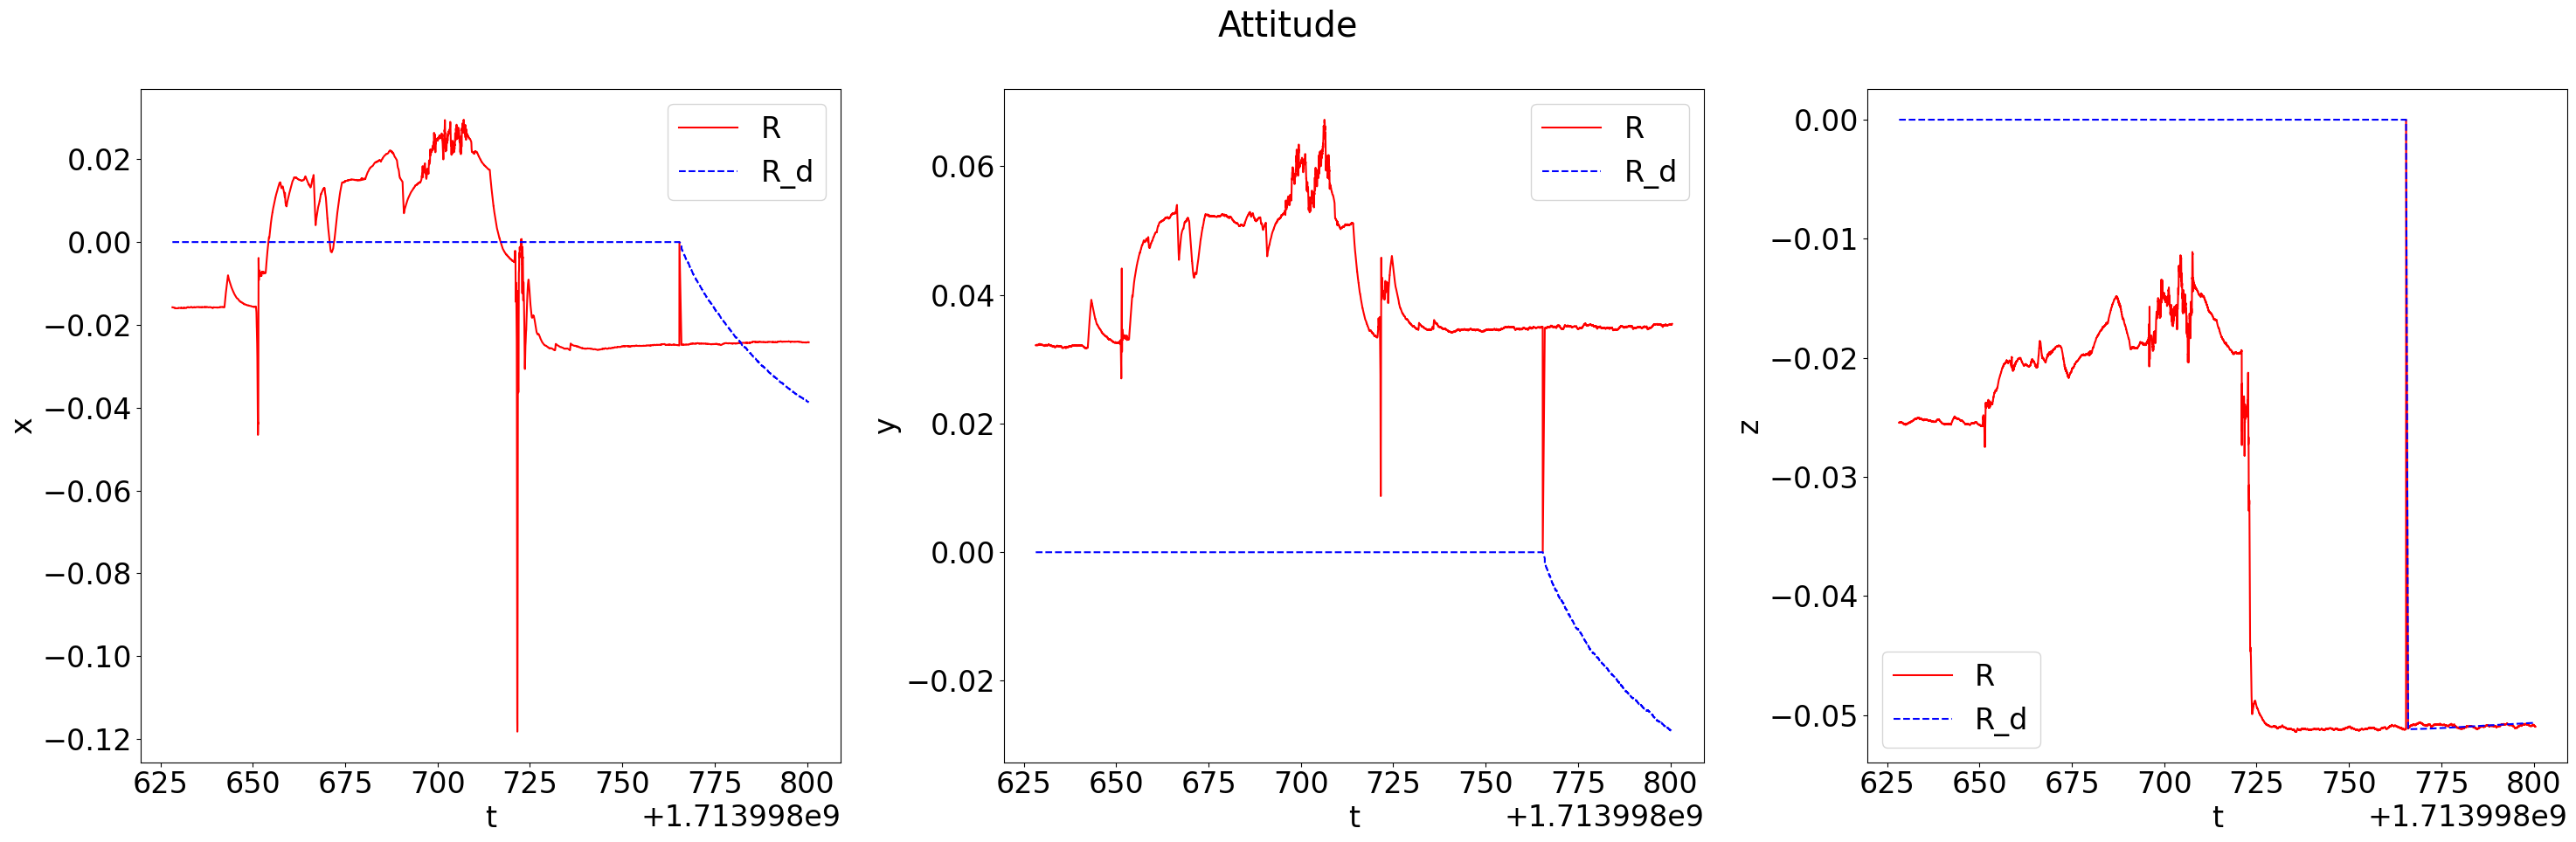

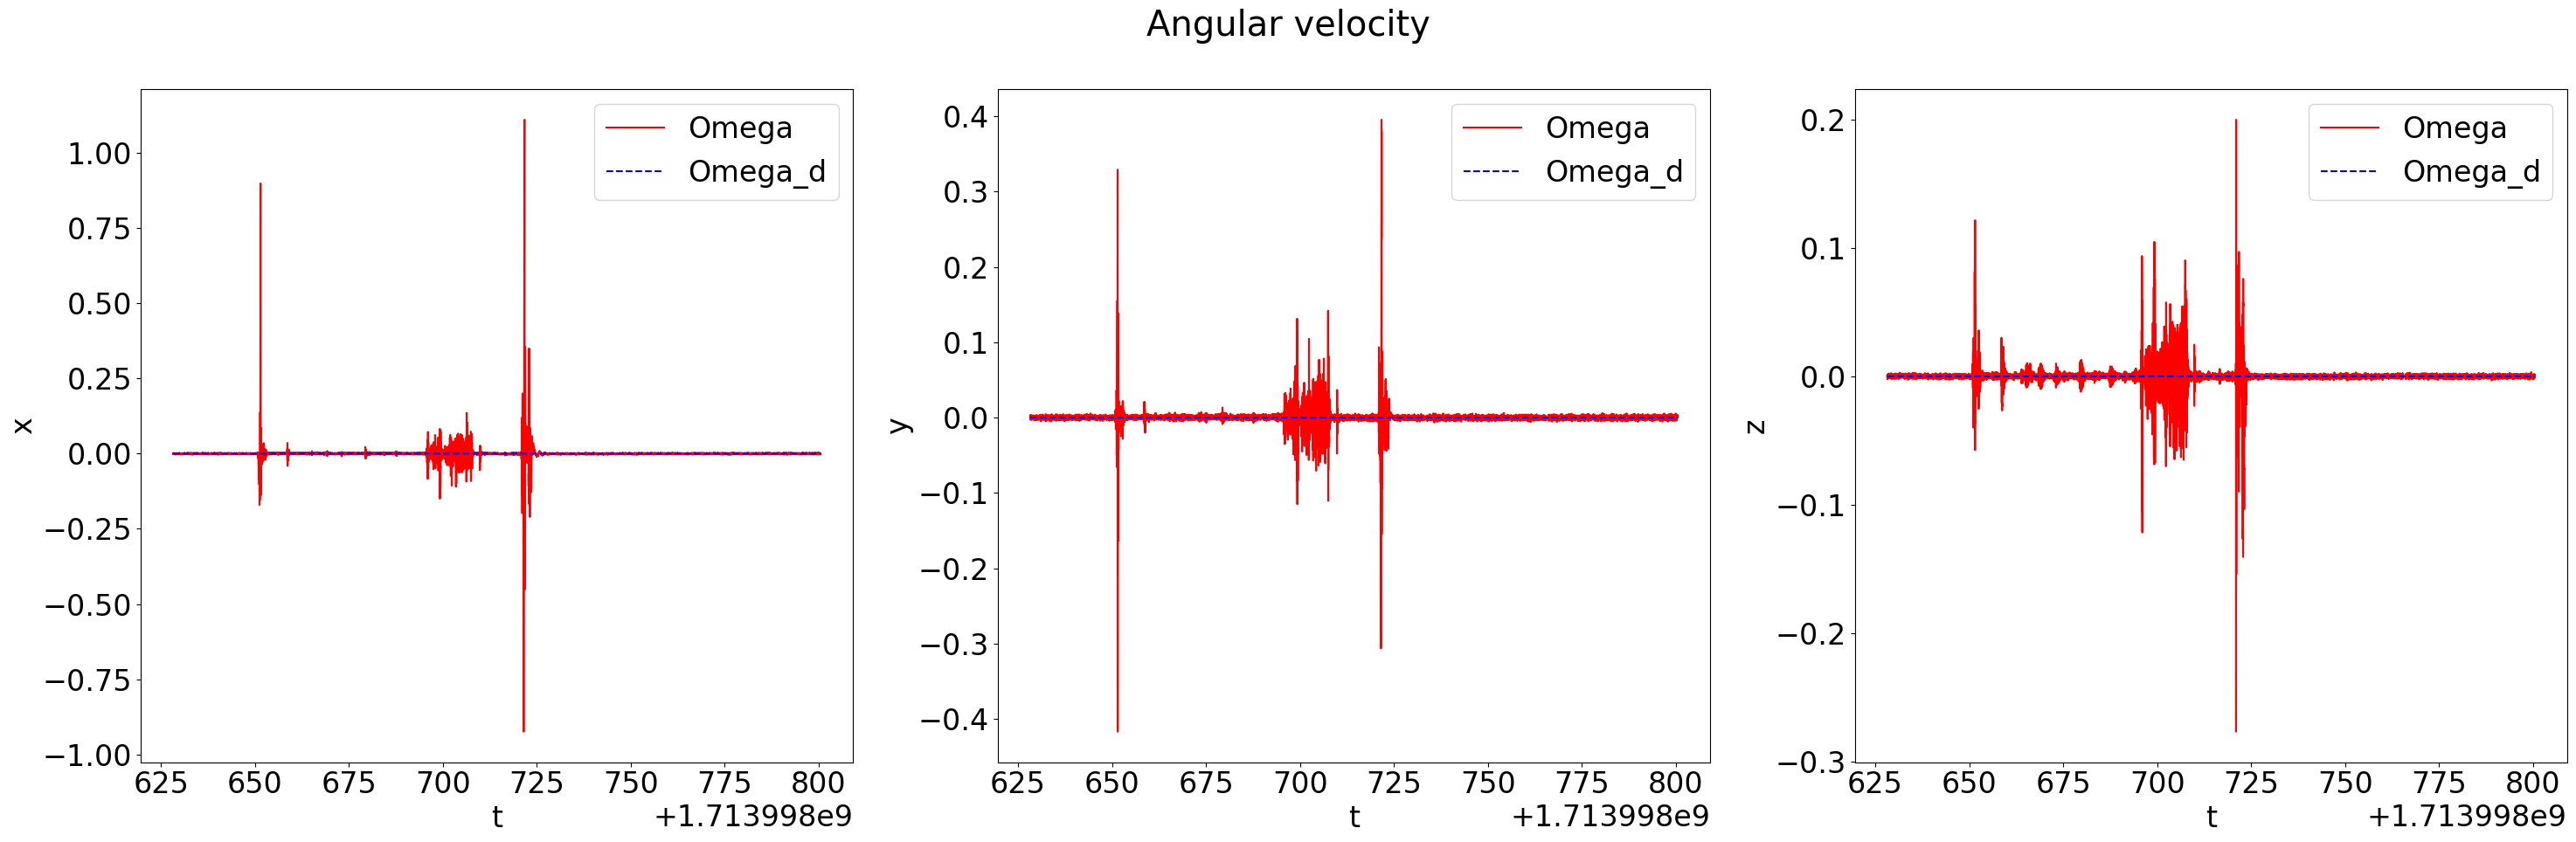

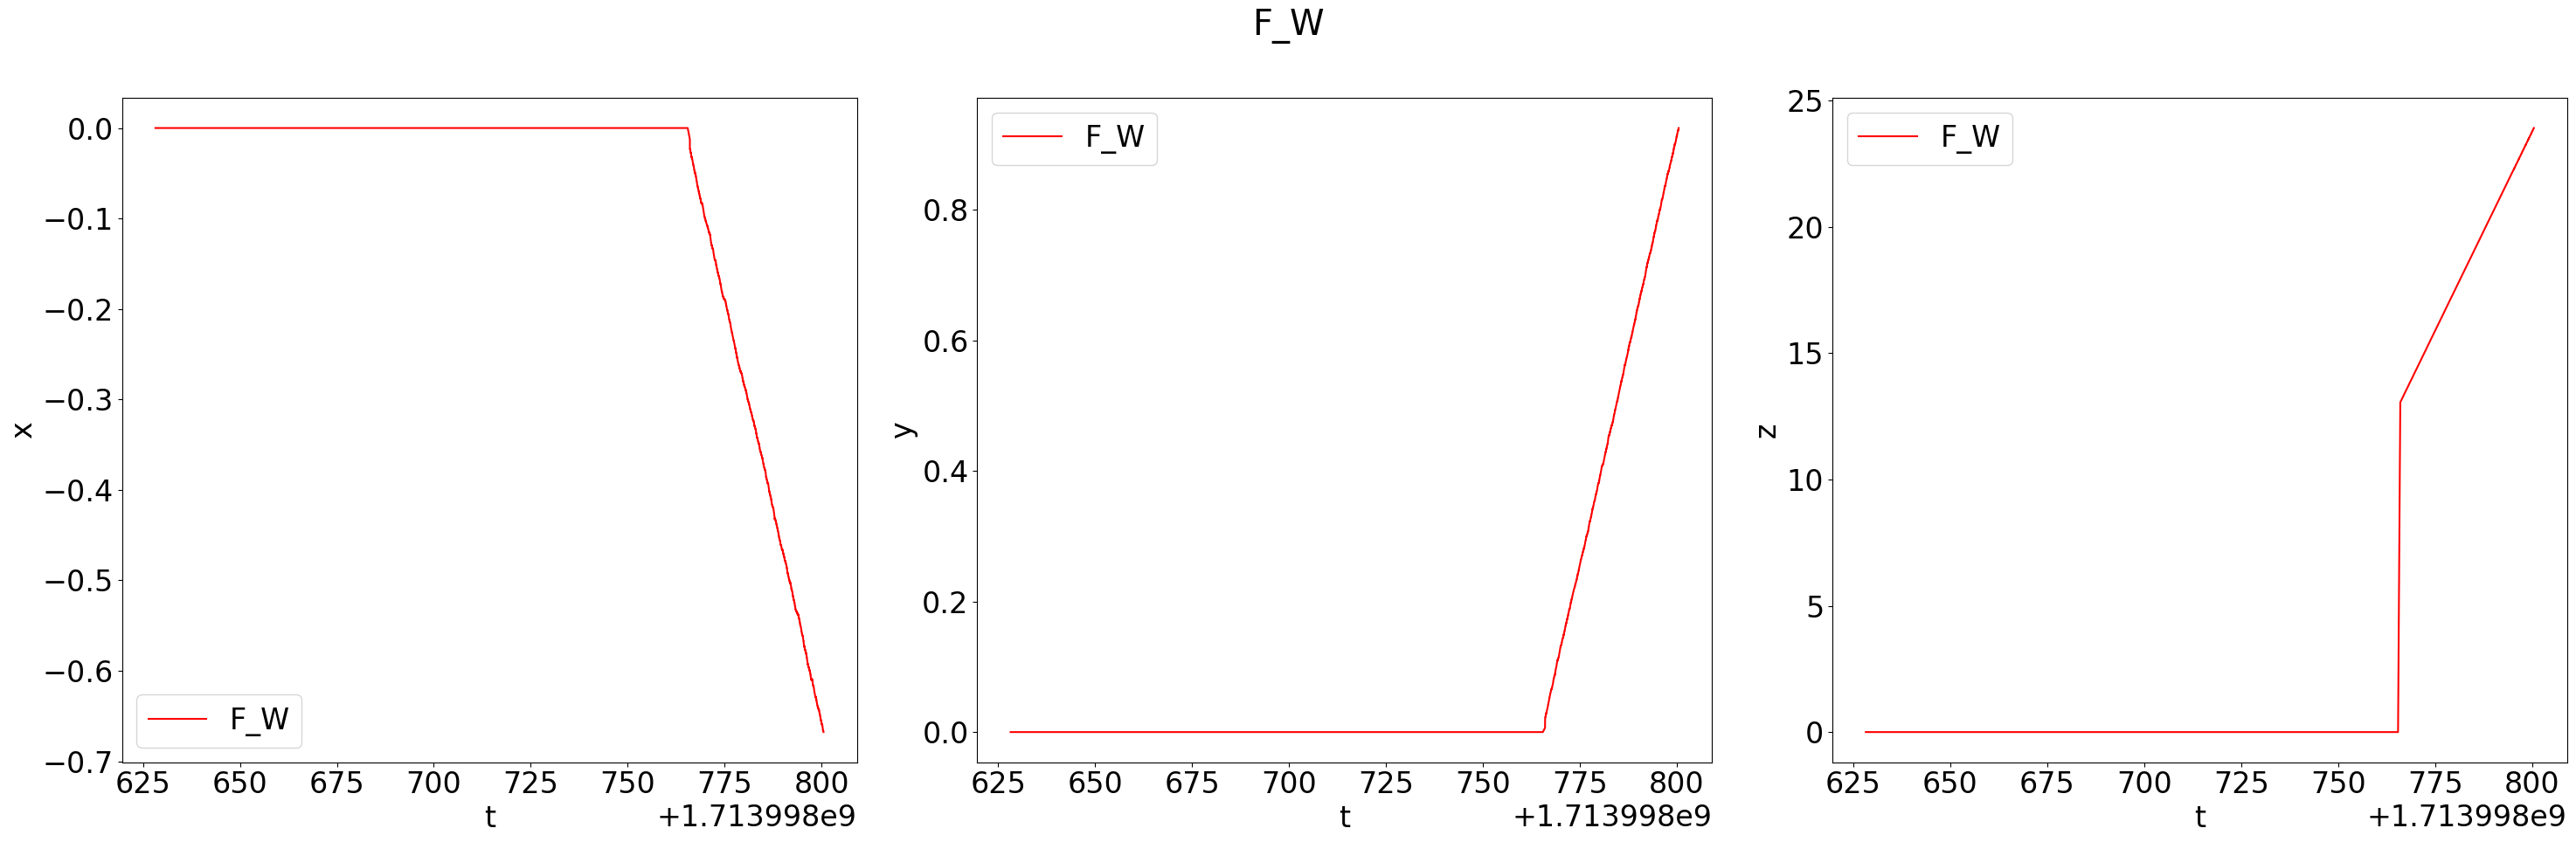

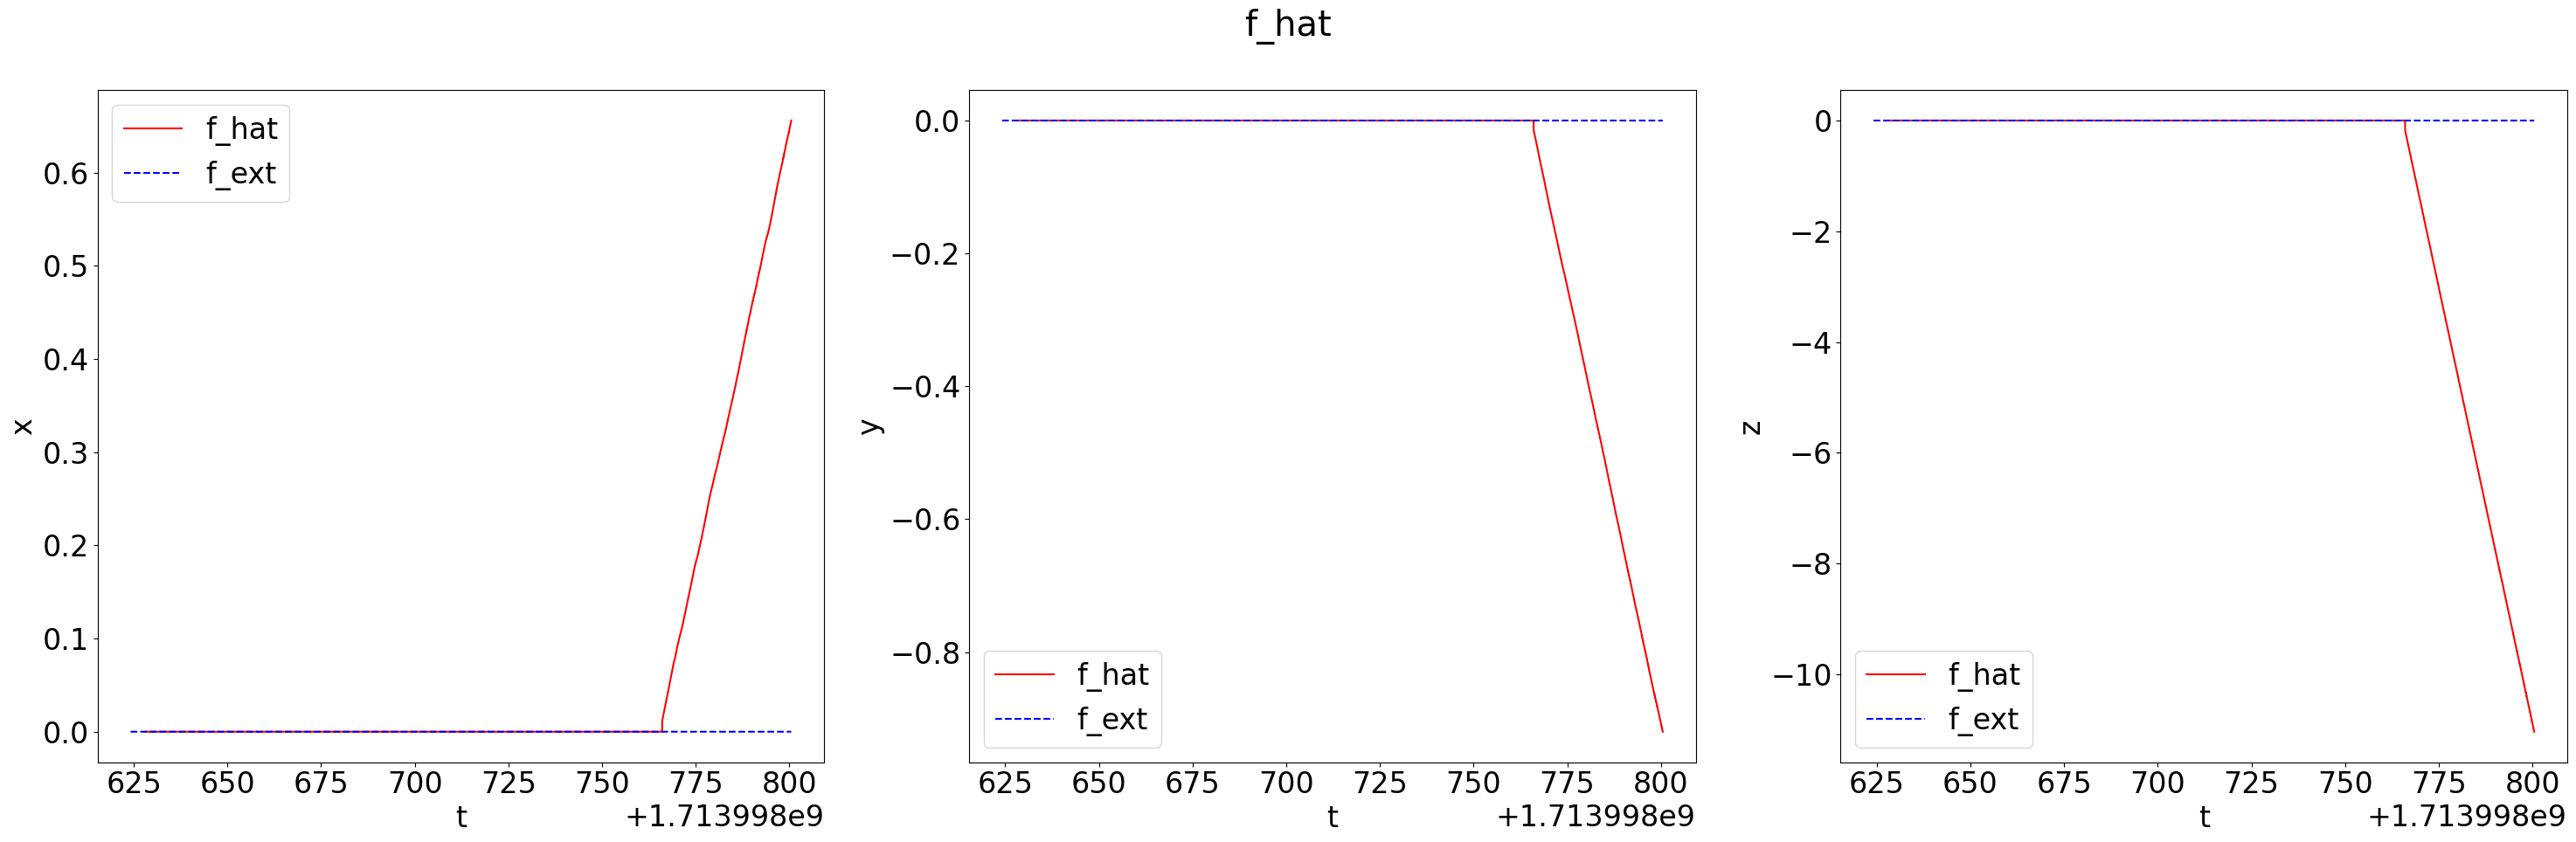

In [205]:
def plot(df_log, df_wind, xlim_left=None, xlim_right=None):
    # A, y
    fig, axes = plt.subplots(1, 2, figsize=(30, 10))

    df_log.plot(x='Time', y='A_norm', ax=axes[0])
    axes[0].set_ylabel('A_norm')
    axes[0].set_xlabel('t')
    axes[0].set_xlim(left=xlim_left, right=xlim_right)
    axes[0].legend()

    df_log.plot(x='Time', y='y_norm', ax=axes[1])
    axes[1].set_ylabel('y_norm')
    axes[1].set_xlabel('t')
    axes[1].legend()
    axes[1].set_xlim(left=xlim_left, right=xlim_right)

    fig.suptitle('A, y')
    plt.tight_layout()
    plt.show()

    # Position
    fig, axes =plt.subplots(1, 3, figsize=(30, 10))

    df_log.plot(x='Time', y='p.x', ax=axes[0], style='r-', label='q')
    df_log.plot(x='Time', y='p_ref.x', ax=axes[0], style='b--', label='r')
    axes[0].set_ylabel('x')
    axes[0].set_xlabel('t')
    axes[0].set_xlim(left=xlim_left, right=xlim_right)
    axes[0].legend()

    df_log.plot(x='Time', y='p.y', ax=axes[1], style='r-', label='q')
    df_log.plot(x='Time', y='p_ref.y', ax=axes[1], style='b--', label='r')
    axes[1].set_ylabel('y')
    axes[1].set_xlabel('t')
    axes[1].set_xlim(left=xlim_left, right=xlim_right)
    axes[1].legend()

    df_log.plot(x='Time', y='p.z', ax=axes[2], style='r-', label='q')
    df_log.plot(x='Time', y='p_ref.z', ax=axes[2], style='b--', label='r')
    axes[2].set_ylabel('z')
    axes[2].set_xlabel('t')
    axes[2].set_xlim(left=xlim_left, right=xlim_right)
    axes[2].legend()

    fig.suptitle('Position')
    plt.tight_layout()
    plt.show()

    # Velocity
    fig, axes = plt.subplots(1, 3, figsize=(30, 10))

    df_log.plot(x='Time', y='v.x', ax=axes[0], style='r-', label='dq')
    df_log.plot(x='Time', y='v_ref.x', ax=axes[0], style='b--',label='dr')
    axes[0].set_ylabel('x')
    axes[0].set_xlabel('t')
    axes[0].set_xlim(left=xlim_left, right=xlim_right)
    axes[0].legend()

    df_log.plot(x='Time', y='v.y', ax=axes[1], style='r-', label='dq')
    df_log.plot(x='Time', y='v_ref.y', ax=axes[1], style='b--',label='dr')
    axes[1].set_ylabel('y')
    axes[1].set_xlabel('t')
    axes[1].set_xlim(left=xlim_left, right=xlim_right)
    axes[1].legend()

    df_log.plot(x='Time', y='v.z', ax=axes[2], style='r-', label='dq')
    df_log.plot(x='Time', y='v_ref.z', ax=axes[2], style='b--',label='dr')
    axes[2].set_ylabel('z')
    axes[2].set_xlabel('t')
    axes[2].set_xlim(left=xlim_left, right=xlim_right)
    axes[2].legend()

    fig.suptitle('Velocity')
    plt.tight_layout()
    plt.show()

    # Attitude
    fig, axes = plt.subplots(1, 3, figsize=(30, 10))

    df_log.plot(x='Time', y='rpy.x', ax=axes[0], style='r-', label='R')
    df_log.plot(x='Time', y='rpy_ref.x', ax=axes[0], style='b--', label='R_d')
    axes[0].set_ylabel('x')
    axes[0].set_xlabel('t')
    axes[0].set_xlim(left=xlim_left, right=xlim_right)
    axes[0].legend()

    df_log.plot(x='Time', y='rpy.y', ax=axes[1], style='r-', label='R')
    df_log.plot(x='Time', y='rpy_ref.y', ax=axes[1], style='b--', label='R_d')
    axes[1].set_ylabel('y')
    axes[1].set_xlabel('t')
    axes[1].set_xlim(left=xlim_left, right=xlim_right)
    axes[1].legend()

    df_log.plot(x='Time', y='rpy.z', ax=axes[2], style='r-', label='R')
    df_log.plot(x='Time', y='rpy_ref.z', ax=axes[2], style='b--', label='R_d')
    axes[2].set_ylabel('z')
    axes[2].set_xlabel('t')
    axes[2].set_xlim(left=xlim_left, right=xlim_right)
    axes[2].legend()

    fig.suptitle('Attitude')
    plt.tight_layout()
    plt.show()

    # Angular velocity
    fig, axes = plt.subplots(1, 3, figsize=(30, 10))

    df_log.plot(x='Time', y='w.x', ax=axes[0], style='r-', label='Omega')
    df_log.plot(x='Time', y='w_ref.x', ax=axes[0], style='b--', label='Omega_d')
    axes[0].set_ylabel('x')
    axes[0].set_xlabel('t')
    axes[0].set_xlim(left=xlim_left, right=xlim_right)
    axes[0].legend()

    df_log.plot(x='Time', y='w.y', ax=axes[1], style='r-', label='Omega')
    df_log.plot(x='Time', y='w_ref.y', ax=axes[1], style='b--', label='Omega_d')
    axes[1].set_ylabel('y')
    axes[1].set_xlabel('t')
    axes[1].set_xlim(left=xlim_left, right=xlim_right)
    axes[1].legend()

    df_log.plot(x='Time', y='w.z', ax=axes[2], style='r-', label='Omega')
    df_log.plot(x='Time', y='w_ref.z', ax=axes[2], style='b--', label='Omega_d')
    axes[2].set_ylabel('z')
    axes[2].set_xlabel('t')
    axes[2].set_xlim(left=xlim_left, right=xlim_right)
    axes[2].legend()

    fig.suptitle('Angular velocity')
    plt.tight_layout()
    plt.show()

    # F_W
    fig, axes = plt.subplots(1, 3, figsize=(30, 10))

    df_log.plot(x='Time', y='F_W.x', ax=axes[0], style='r-', label='F_W')
    axes[0].set_ylabel('x')
    axes[0].set_xlabel('t')
    axes[0].set_xlim(left=xlim_left, right=xlim_right)
    axes[0].legend()

    df_log.plot(x='Time', y='F_W.y', ax=axes[1], style='r-', label='F_W')
    axes[1].set_ylabel('y')
    axes[1].set_xlabel('t')
    axes[1].legend()
    axes[1].set_xlim(left=xlim_left, right=xlim_right)

    df_log.plot(x='Time', y='F_W.z', ax=axes[2], style='r-', label='F_W')
    axes[2].set_ylabel('z')
    axes[2].set_xlabel('t')
    axes[2].legend()

    fig.suptitle('F_W')
    axes[2].set_xlim(left=xlim_left, right=xlim_right)
    plt.tight_layout()
    plt.show()

    # f_hat
    fig, axes = plt.subplots(1, 3, figsize=(30, 10))

    df_wind['w_total.x'] = df_wind['w_nominal.x'] + df_wind['w_gust.x']
    df_wind['w_total.y'] = df_wind['w_nominal.y'] + df_wind['w_gust.y']
    df_wind['w_total.z'] = df_wind['w_nominal.z'] + df_wind['w_gust.z']

    df_log.plot(x='Time', y='f_hat.x', ax=axes[0], style='r-', label='f_hat')
    df_wind.plot(x='Time', y='w_total.x', ax=axes[0], style='b--', label='f_ext')
    axes[0].set_ylabel('x')
    axes[0].set_xlabel('t')
    axes[0].set_xlim(left=xlim_left, right=xlim_right)
    axes[0].legend()

    df_log.plot(x='Time', y='f_hat.y', ax=axes[1], style='r-', label='f_hat')
    df_wind.plot(x='Time', y='w_total.y', ax=axes[1], style='b--', label='f_ext')
    axes[1].set_ylabel('y')
    axes[1].set_xlabel('t')
    axes[1].legend()
    axes[1].set_xlim(left=xlim_left, right=xlim_right)

    df_log.plot(x='Time', y='f_hat.z', ax=axes[2], style='r-', label='f_hat')
    df_wind.plot(x='Time', y='w_total.z', ax=axes[2], style='b--', label='f_ext')
    axes[2].set_ylabel('z')
    axes[2].set_xlabel('t')
    axes[2].legend()

    fig.suptitle('f_hat')
    axes[2].set_xlim(left=xlim_left, right=xlim_right)
    plt.tight_layout()
    plt.show()

plot(df_log, df_wind)
